Choose the type of graph:
1. Bar
2. Line
3. Pie


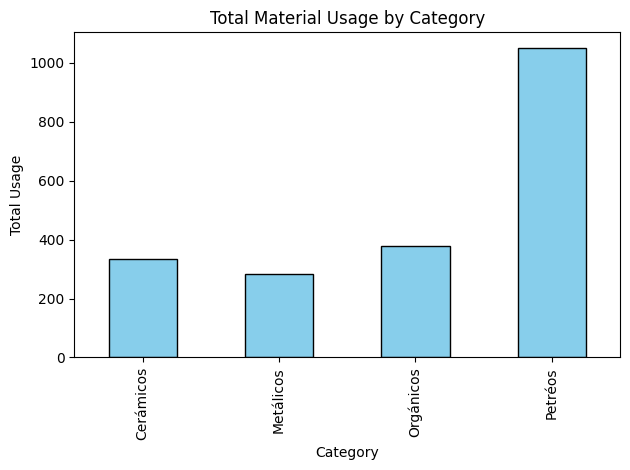

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def create_report_directories():
    """
    Creates a directory named "Reporte de materiales" and subdirectories for each material.
    """
    os.makedirs("Reporte de materiales", exist_ok=True)
    
    materials_df = pd.read_csv("../data/Materiales.csv")
    for material_name in materials_df['Nombre']:
        os.makedirs(f"Reporte de materiales/{material_name}", exist_ok=True)

def calculate_material_usage():
    """
    Reads the project data and calculates total, average usage, and cost per material.
    Creates a text file report for each material in its respective folder.
    """
    projects_df = pd.read_csv("../data/Proyectos.csv")
    materials_df = pd.read_csv("../data/Materiales.csv")
    
    for _, material in materials_df.iterrows():
        material_id = material['ID']
        material_name = material['Nombre']
        unit_price = material['Valor Unitario']
        
        material_usage = projects_df[projects_df['ID Material'] == material_id]['Cantidad']
        total_usage = material_usage.sum()
        avg_usage = material_usage.mean()
        total_cost = total_usage * unit_price
        
        report_path = f"Reporte de materiales/{material_name}/reporte.txt"
        with open(report_path, 'w') as file:
            file.write(f"{total_usage}\n")
            file.write(f"{avg_usage}\n")
            file.write(f"{total_cost}\n")

def ask_for_graph_type():
    """
    Asks the user if they want to create a graphical report and prompts for graph type if confirmed.
    """
    response = input("Do you want to create a graphical report? (yes/no): ").strip().lower()
    if response == 'yes':
        print("Choose the type of graph:\n1. Bar\n2. Line\n3. Pie")
        graph_choice = input("Enter the number of the graph type: ").strip()
        return graph_choice
    return None

def create_bar_chart(materials_df, projects_df):
    """
    Creates a bar chart showing the total amount of material used by category.
    """
    usage_by_category = projects_df.merge(materials_df, left_on='ID Material', right_on='ID') \
                                   .groupby('Categoria')['Cantidad'].sum()
    usage_by_category.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title("Total Material Usage by Category")
    plt.xlabel("Category")
    plt.ylabel("Total Usage")
    plt.tight_layout()
    plt.savefig("../graphs/Bar_Chart.png")
    plt.show()

def create_line_chart(projects_df, year, include_both_years=False):
    """
    Creates a line chart for monthly material costs for a specific year or both years.
    """
    projects_df['Fecha'] = pd.to_datetime(projects_df['Fecha'], origin='1899-12-30', unit='D')
    projects_df['Year'] = projects_df['Fecha'].dt.year
    projects_df['Month'] = projects_df['Fecha'].dt.month
    
    monthly_costs = projects_df.groupby(['Year', 'Month'])['Cantidad'].sum()
    
    if include_both_years:
        monthly_costs = monthly_costs.unstack(level=0)
        monthly_costs.plot(kind='line', marker='o')
        plt.legend(title="Year")
    else:
        monthly_costs = monthly_costs[monthly_costs.index.get_level_values('Year') == year]
        monthly_costs.plot(marker='o')
        
    plt.title(f"Monthly Material Costs ({year if not include_both_years else '2022 & 2023'})")
    plt.xlabel("Month")
    plt.ylabel("Total Cost")
    plt.tight_layout()
    plt.savefig(f"../graphs/Line_Chart_{year}.png")
    plt.show()

def create_pie_chart(clients_df):
    """
    Creates a pie chart of project participation by city.
    """
    project_counts = clients_df['Ciudad'].value_counts()
    project_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, labels=project_counts.index)
    plt.title("Project Participation by City")
    plt.ylabel('')
    plt.tight_layout()
    plt.savefig("../graphs/Pie_Chart.png")
    plt.show()

def main():
    """
    Main function to run the report generation and graph creation process.
    """
    # Step 1: Create report directories
    create_report_directories()
    
    # Step 2: Generate material reports
    calculate_material_usage()
    
    # Step 3: Ask user if they want to create graphs
    graph_choice = ask_for_graph_type()
    
    # Load data for graph generation
    materials_df = pd.read_csv("../data/Materiales.csv")
    projects_df = pd.read_csv("../data/Proyectos.csv")
    clients_df = pd.read_csv("../data/Clientes.csv")
    
    if graph_choice == '1':
        create_bar_chart(materials_df, projects_df)
    elif graph_choice == '2':
        include_both_years = input("Do you want to include both years? (yes/no): ").strip().lower() == 'yes'
        if include_both_years:
            create_line_chart(projects_df, None, include_both_years=True)
        else:
            year = int(input("Enter the year (2022 or 2023): ").strip())
            create_line_chart(projects_df, year)
    elif graph_choice == '3':
        create_pie_chart(clients_df)
    elif graph_choice:
        print("Invalid option")

if __name__ == "__main__":
    main()

